## Statistical Modelling. Lecture 3 Tutorial Sheet
Further inference and significance of regression

---

### Exercise 1
The manager of the purchasing department of a large company would like to
develop a regression model to predict the average amount of time it takes to
process a given number of invoices. Over a 30-day period, data are collected on
the number of invoices processed and the total time taken (in hours). The data is given in the file [https://raw.githubusercontent.com/uqglmn/sm/main/invoices.csv](https://raw.githubusercontent.com/uqglmn/sm/main/invoices.csv)

**1.1.** Read the data from the file and inspect the result. Then create two vectors, $x$ and $y$, for predictor (Invoices) and response (Time) variables.

In [1]:
data = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/invoices.csv", row.names="Day")  # read data into a dataframe
head(data)  # inspect dataframe

,Invoices,Time
,<int>,<dbl>
1,149,2.1
2,60,1.8
3,188,2.3
4,23,0.8
5,201,2.7
6,58,1.0


**1.2.** Fit a simple linear regression model to the data. Then draw a scatter plot of the data and the fitted regression line. You will need to use the following formulas:
$$\hat\beta_1 = \frac{s_{xy}}{s_{xx}} , \qquad \hat\beta_0 = \bar y - \hat\beta_1 \bar x$$
where
$$ s_{xx} = \sum_{i=1}^n (x_i - \bar x)^2 , \qquad s_{xy} = \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y) $$

In [2]:
# Write your solution here
x = data$Invoices
y = data$Time
n = length(y)
sxx = sum( (x - mean(x))**2)
sxy = sum( (x - mean(x)) * (y - mean(y)))
b1hat = sxy/sxx
b0hat = mean(y) - (b1hat * mean(x))
yhat = b0hat + b1hat * x



**1.3.** Find the 95% confidence interval for the start-up time, i.e., $\beta_0$. You will need to use the following formulas:

$$
{\rm CI(\beta_0)} = \big[ \hat\beta_0 - t_{\alpha/2,\, n-2}\cdot {\rm se}(\hat\beta_0), \hat\beta_0 + t_{\alpha/2,\, n-2}\cdot {\rm se}(\hat\beta_0) \big]
$$
where
$$
{\rm se}(\hat\beta_0) = \sqrt{ \hat\sigma^2( 1/n+\bar x^2/s_{xx})} ,\qquad \hat\sigma^2 = \frac{1}{n-2}\sum_{i=1}^n (y_i - \hat y_i)^2.
$$

Use ``qt(1-0.05/2, n-2)`` to get the critical t-value, $t_{\alpha/2,\, n-2}$.

In [7]:
# Write your solution here
sigma2hat = (1/(n-2))*(sum((y - yhat)**2))
seb0hat = sqrt(sigma2hat*(1/(n) + (mean(x)**2) / sxx))
ctv = qt(1 - 0.05/2, (n-2))
cib0min = b0hat - ctv * seb0hat
cib0max = b0hat + ctv * seb0hat
print(cib0min)
print(cib0max)

[1] 0.3912496
[1] 0.8921701


**1.4.** Find a point estimate and the 95% prediction interval for the time taken to process 130 invoices. You will need to use the following formulas:

$$
{\rm PI}(y_0) = \big[ \hat y_0 - t_{\alpha/2,\, n-2}\cdot {\rm se}(\hat y_0), \hat y_0 + t_{\alpha/2,\, n-2}\cdot {\rm se}(\hat y_0) \big]
$$

where $\hat y_0 = \hat\beta_0 + \hat\beta_1 x_0$ is the predicted value at $x_0$ and

$$
{\rm se}(\hat y_0) = \sqrt{\hat\sigma^2(1 + 1/n + (x_0 - \bar x)^2 / s_{xx})}
$$

In [17]:
# Write your solution here
x0 = 130
y0hat = b0hat + b1hat * x0
seyhat = sqrt( sigma2hat*((1+(1/n)) + ((x0 - mean(x))**2)/sxx ))
piy0min = y0hat - (ctv * seyhat)
piy0max = y0hat + (ctv * seyhat)
round(c(piy0min, piy0max), 3)


[1] 1.423 2.796

**1.5.** Plot the data, the fitted model, and indicate the point estimate and the prediction interval you found above.

- Use [points()](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/points.html) to draw a point at the specified coordinates.
    - Code snippet: ``points(x, y, pch=19, col="red")``
- Use [segments()](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/segments.html) to draw a vertical line segment in up and down direction from the epoint. The length of the segment should equal the PI at the estimated point.
    - Code snippet: ``segments(x1, y1, x2, y2, col="red", lend='butt')``
- Use [legend()](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/legend.html) to draw a legend.
    -  Code snippet: ``legend(x, y, legend=c("95% PI for 130 Incoives"), col="red", lty=1, box.lty=0)``

You should obtain the plot shown below.

<img src="https://raw.githubusercontent.com/uqglmn/sm/main/slr/L3.png" alt="Plot" width="400"/>

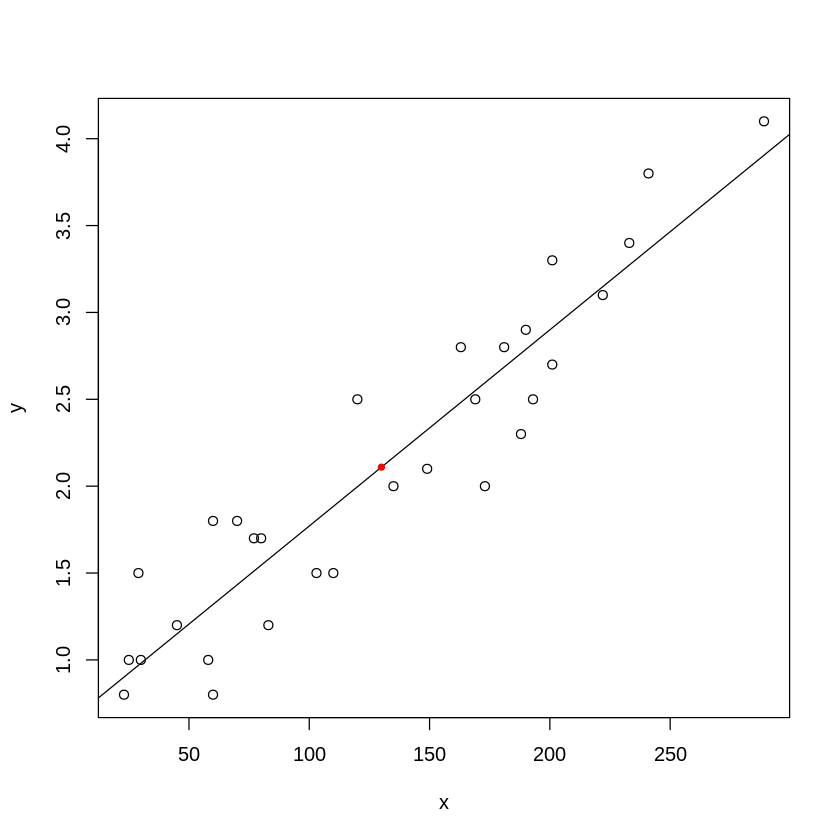

In [28]:
# write your solution here
plot(x = x, y = y,
     )
abline(a = b0hat, b = b1hat)
points(x0, y0hat, col = "red", pch = 20)
segments()

#### Built-in statistical functions

Verify your results using built-in statistical functions.

In [ ]:
# fit a simple linear regression model. name your model "model1"
# write your solution here



In [ ]:
# 95% confidence interval
# write your solution here




In [ ]:
# 95% prediction interval
# your results in 1.4 must coincide with the ones below
newdata = data.frame(Invoices = 130)
round(predict(model1, newdata = newdata, interval = "prediction", level=0.95),3)

,fit,lwr,upr
1,2.11,1.423,2.796


---

### Exercise 2
To calibrate an instrument which measures the lactic acid concentration in
blood, an investigator used twenty samples of known concentration ($x$) and
then obtained the concentration as measured on the instrument ($y$). The data is given below.

In [ ]:
x = c(1,1,1,1,3,3,3,3,5,5,5,5,10,10,10,10,15,15,15,15)
y = c(1.1,0.7,1.8,0.4,3.0,2.4,4.9,4.4,4.5,7.3,8.2,6.2,12.0,13.1,12.6,13.2,18.7,19.7,17.4,17.1)

**2.1.** Fit a simple linear regression model to the data. Then draw a scatter plot of the data and the fitted regression line.

In [ ]:
# Write your solution here



**2.2.** Compute the total sum of squares, $SS_T$, the regression sum of squares, $SS_R$, and the residual sum of squares, $SS_E$:

$$
SS_T = \sum_{i=1}^n(y_i-\bar y)^2 \qquad
SS_R = \sum_{i=1}^n(\hat y_i-\bar y)^2 \qquad
SS_E = \sum_{i=1}^n(y_i-\hat y_i)^2
$$

where $\hat y_i = \hat\beta_0 + \hat\beta_1 x_i$ are fitted values. Then verify the analysis of variance identity

$$
SS_T = SS_R + SS_E
$$

Hint. Use function ``all.equal()`` to compare floating point numerals, if needed.

In [ ]:
# Write your solution here



**2.3.** Construct the analysis of variance table and test the signifiance of regression assuming $\alpha=5\%$. The critical $F$-value $F_{1-\alpha, 1, n-1}$ can be obtained using ``qf(1-0.05, 1, n-1)``. You need to fill-in the table below.

| Source of Variation |  d.o.f. |   SS   |   MS   |   F   |
|:--------------------|--------:|-------:|-------:|------:|
| Regression          | $\nu_R$ | $SS_R$ | $MS_R$ | $F$   |
| Residual            | $\nu_E$ | $SS_E$ | $MS_E$ |       |
| Total               | $\nu_T$ | $SS_T$ |        |       |

**Question.** Is the regression significant?

In [ ]:
# Write your solution here



**2.6.** Compute the coefficient of determination
$$
R^2 = 1 - \frac{SS_E}{SS_T}
$$

**Question.** What percentage of the total variablility of measured concentration is accounted for by the linear relationship with known concentration?

In [ ]:
# Write your solution here



#### Built-in statistical functions

Verify your results using built-in statistical functions.

In [ ]:
# fit a simple linear regression model and display the summary table
# Write your solution here



In [ ]:
# analysis of variance table
# Write your solution here



---

### Exercise 3
The file [https://raw.githubusercontent.com/uqglmn/sm/main/gasoline.csv](https://raw.githubusercontent.com/uqglmn/sm/main/gasoline.csv) presents data on the gasoline mileage performance of 32 different
automobiles.

**3.1.** Fit a simple linear regression model relating gasoline mileage $y$ (miles per gallon) to engine displacement $x$ (cubic inches). Then draw a scatter plot of the data and the fitted regression line.

In [ ]:
# Write your solution here



**3.2.** Construct the analysis of variance table and test for significance of regression assuming $\alpha=2.5\%$.

In [ ]:
# Write your solution here



**3.3.** What percent of the total variability in gasoline mileage is accounted for by the linear relationship with engine displacement?

In [ ]:
# Write your solution here



**3.4.** Find a 97.5% CI on the mean gasoline mileage if the engine displacement is 275 cubic inches.

In [ ]:
# Write your solution here



**3.5.** Suppose that we wish to predict the gasoline mileage obtained from a car with a 275 cubic inches engine. Give a point estimate of mileage. Find a 97.5% prediction interval on the mileage.

In [ ]:
# Write your solution here



**3.6.** Compare the two intervals obtained in parts 3.4. and 3.5. Explain the difference between them. Which one is wider, and why?

In [ ]:
# Write your solution here



#### Built-in statistical functions

Verify your results using built-in statistical functions.

In [ ]:
# Write your solution here



---

### Exercise 4
Consider again the gasoline mileage data in [https://raw.githubusercontent.com/uqglmn/sm/main/gasoline.csv](https://raw.githubusercontent.com/uqglmn/sm/main/gasoline.csv). Repeat parts 3.1, 3.2 and 3.2 of Exercise 3 only this time using vehicle weight $w$ (pounds) as the predictor variable. Then compare your results with the ones you obtained in Exercise 3 and determine which of the two predictors explains better the gasoline mileage?

In [ ]:
# Write your solution here



---

### Exercise 5
Consider the simple linear regression model.

1. Show that the regression sum of squares, $SS_R = \sum_{i=1}^n (\hat y_i - \bar y)^2$, can be alternatively written as $SS_R = \dfrac{s_{xy}^2}{s_{xx}}$.

2. Then show that the residual sum of squares, $SS_E = \sum_{i=1}^n (\hat y_i - y_i)^2$, can be alternatively written as $SS_E = s_{yy} - \dfrac{s_{xy}^2}{s_{xx}}$.

Here recall that $s_{xy} = \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)$, and $s_{xx}$, $s_{yy}$ are defined similarly.

This exercise should be done by hand.

*Hint: You need to use $\hat y_i = \hat\beta_0 + \hat\beta_1 x_i$ and the explicit form of $\hat\beta_0$ and $\hat\beta_1$.*

---

### Exercise 6
Consider the no-intercept model

$$
y_i = \beta x_i + \varepsilon_i \quad\text{with}\quad \varepsilon_i \overset{ind}{\sim} N(0, \sigma^2)\quad\text{for}\quad i=1,\dots,n.
$$

In Exercise 4 of Sheet 2 you had to show that the least squares estimate of $\beta$ and its sampling distribution are given by

$$
\hat\beta = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} \quad\text{and}\quad \hat\beta \sim N\Big( \beta, \sigma^2/\sum_{i=1}^n x_i^2\Big)
$$

1. Derive a formula for a $100(1-\alpha)\%$ confidence interval on $\beta$.

2. Show that the sampling distribution of the least squares estimate of the mean response $\mu_0$ at $x_0$ is given by

$$
\hat\mu_0 \sim N\Big(\mu_0, x_0^2 \sigma^2/\sum_{i=1}^n x_i^2 \Big)
$$

3. Derive a formula for a $100(1-\alpha)\%$ confidence interval on $\mu_0$.

4. Derive a formula for a $100(1-\alpha)\%$ prediction interval on a new observation $y_0$ at $x_0$.

This exercise should be done by hand.

*Hint: Revisit Sections 2.1, 2.2 and 2.3 of the Lecture notes.*

---

### Exercise 7 (Advanced)
Let $Y_1, \ldots, Y_n$ be independent random variables with a common nonzero mean $\mu$ and variances $\sigma^2_1, \ldots, \sigma^2_n$. Prove that
$$
\sum_{i=1}^n \frac{(Y_i - \bar Y)^2}{n(n-1)}
$$
is an unbiased estimator of ${\rm Var}(\bar Y)$.

This exercise should be done by hand.


---